# Dissovle state boundaries

Using geopandas to take the Australian Remoteness Area boundaries (which are provided by state) and remove the state boundaries

A sample of the properties is:

```json
{
    "properties":{
        "RA_CODE16":"11"
        ,"RA_NAME16":"Inner Regional Australia"
        ,"STE_CODE16":"1"
        ,"STE_NAME16":"New South Wales"
        ,"AREASQKM16":87424.8418
    }
}
```


In [1]:
## Import libraries
import pandas as pd
import math
import geopandas
import matplotlib.pyplot as plt

In [2]:
## Read in the file
inputfile='./RA_2016_AUST-simple.geojson'
ra = geopandas.read_file(inputfile)

<AxesSubplot:>

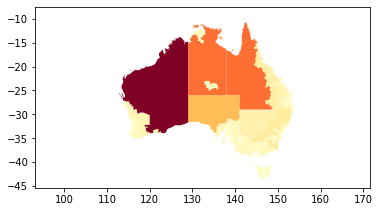

In [3]:
## plot the shape file on the map
ra.plot(column = 'AREASQKM16', cmap='YlOrRd')


In [4]:
## Print the tabular data of the GeoSeries
ra


,RA_CODE16,RA_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,10,Major Cities of Australia,1,New South Wales,5.661639e+03,"MULTIPOLYGON (((149.06151 -35.15969, 149.11550..."
1,11,Inner Regional Australia,1,New South Wales,8.742484e+04,"MULTIPOLYGON (((145.56444 -35.64322, 145.55328..."
2,12,Outer Regional Australia,1,New South Wales,2.985141e+05,"MULTIPOLYGON (((141.71041 -34.09829, 141.71569..."
3,13,Remote Australia,1,New South Wales,2.184631e+05,"MULTIPOLYGON (((145.92649 -30.08885, 145.92151..."
4,14,Very Remote Australia,1,New South Wales,1.907470e+05,"MULTIPOLYGON (((159.07611 -31.55778, 159.07286..."
5,15,Migratory - Offshore - Shipping (NSW),1,New South Wales,NaN,None
6,19,No usual address (NSW),1,New South Wales,NaN,None
7,20,Major Cities of Australia,2,Victoria,4.849332e+03,"MULTIPOLYGON (((144.41586 -37.66466, 144.42424..."
8,21,Inner Regional Australia,2,Victoria,7.589673e+04,"MULTIPOLYGON (((141.94335 -37.70974, 141.93931..."
9,22,Outer Regional Australia,2,Victoria,1.311269e+05,"MULTIPOLYGON (((146.23141 -39.08845, 146.23668..."


In [5]:
## Clean out polygons without area
ra_clean = ra[ra.area > 0]
## Remove the state from the RA Code before dissolve
ra_clean['RA_CODE16'] = pd.to_numeric(ra_clean['RA_CODE16']) % 10

In [6]:
## Dissolve state boundaries
aus = ra_clean.dissolve(by='RA_NAME16', as_index=False)
## Overwrite the state fields to Australia
aus['STE_CODE16'] = None
aus['STE_NAME16'] = 'Australia'
aus

,RA_NAME16,geometry,RA_CODE16,STE_CODE16,STE_NAME16,AREASQKM16
0,Inner Regional Australia,"MULTIPOLYGON (((147.66558 -42.87001, 147.65329...",1,None,Australia,87424.8418
1,Major Cities of Australia,"MULTIPOLYGON (((144.42211 -38.08523, 144.43273...",0,None,Australia,5661.6391
2,Outer Regional Australia,"MULTIPOLYGON (((146.88218 -43.58617, 146.90354...",2,None,Australia,298514.1279
3,Remote Australia,"MULTIPOLYGON (((146.27499 -43.63712, 146.28641...",3,None,Australia,218463.1354
4,Very Remote Australia,"MULTIPOLYGON (((148.34350 -40.49831, 148.34701...",4,None,Australia,190747.0381


<AxesSubplot:>

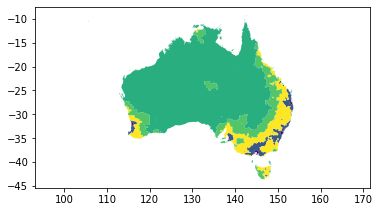

In [7]:
aus.plot(column = 'AREASQKM16')

In [8]:
## Write to geojson
aus.to_file("aus.geojson", driver="GeoJSON")